In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### You can add your own column name

In [2]:
columns =['DATE', 'TAG', 'POSTS']
df = pd.read_csv('QueryResults.csv', names=columns, header=0)

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.shape

(1991, 3)

In [5]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

### Challenge

* The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

* Also, some languages are older like C and other languages are newer (like Swift). The dataset starts in July 2008, so some languages will not have any posts for every month. Can you count how many months of posts exist for each programming language?

#### If we .sum() the number of posts then we can see how many posts each programming language had since the creation of Stack Overflow.

In [6]:
grouped_value = df.groupby('TAG').sum()


In [7]:
grouped_value

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


### data cleaning

In [9]:
df['DATE']

0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
1986    2020-07-01 00:00:00
1987    2020-07-01 00:00:00
1988    2020-07-01 00:00:00
1989    2020-07-01 00:00:00
1990    2020-07-01 00:00:00
Name: DATE, Length: 1991, dtype: object

In [10]:
type(df['DATE'][0])

str

### pd.to_datetime clean the last 00:00:00 in date

In [11]:
df.DATE = pd.to_datetime(df.DATE)

In [12]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


### Data Manipulation: Pivoting DataFrames

In [13]:
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')


In [14]:
pivoted_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [15]:
pivoted_df.shape

(145, 14)

In [16]:
pivoted_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

###  Dealing with NaN(not a number)
#### here inplace argument means that we are updating pivoted_df

In [17]:
pivoted_df.fillna(0, inplace=True)

In [18]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [19]:
pivoted_df.isna().head(3)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### its check is there any NaN value present or not

In [20]:
pivoted_df.isna().values.any()

False

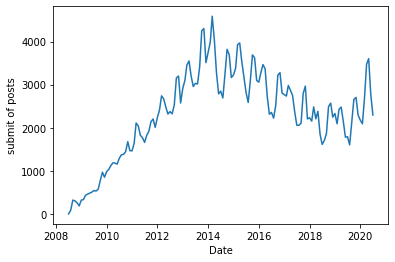

In [26]:
plt.xlabel("Date")
plt.ylabel("submit of posts")
plt.plot(pivoted_df.index, pivoted_df.c);

In [32]:
pivoted_df.columns[0:]

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

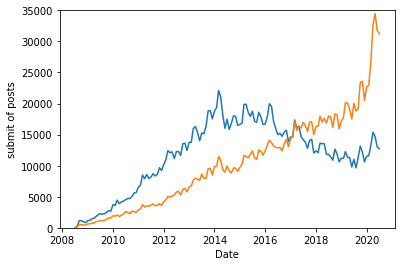

In [36]:
plt.xlabel("Date")
plt.ylabel("submit of posts")
plt.ylim(0,35000)
plt.plot(pivoted_df.index, pivoted_df.java);
plt.plot(pivoted_df.index, pivoted_df.python);

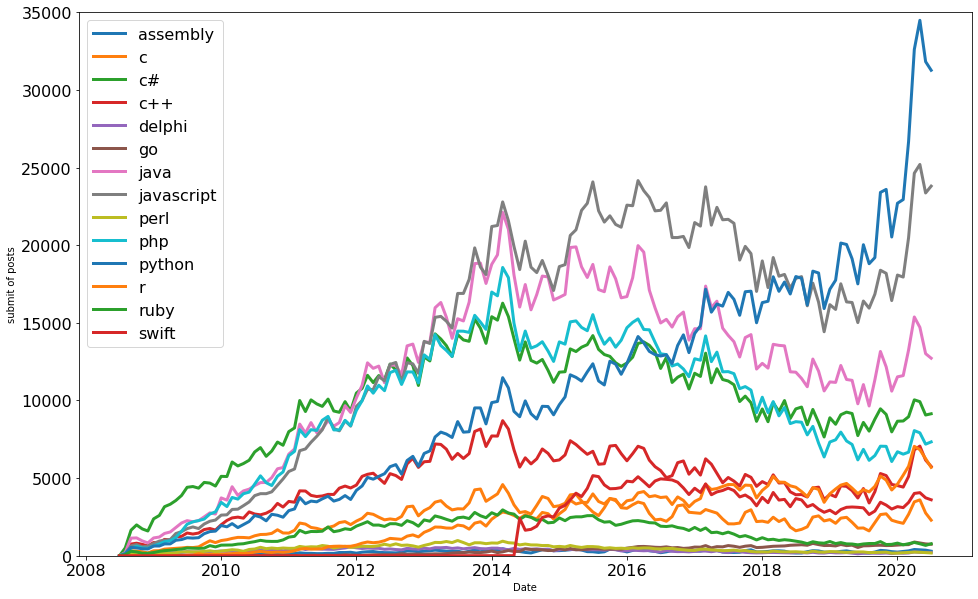

In [44]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("submit of posts")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)
    plt.legend(fontsize=16)

### smoothing (rolling() and mean())

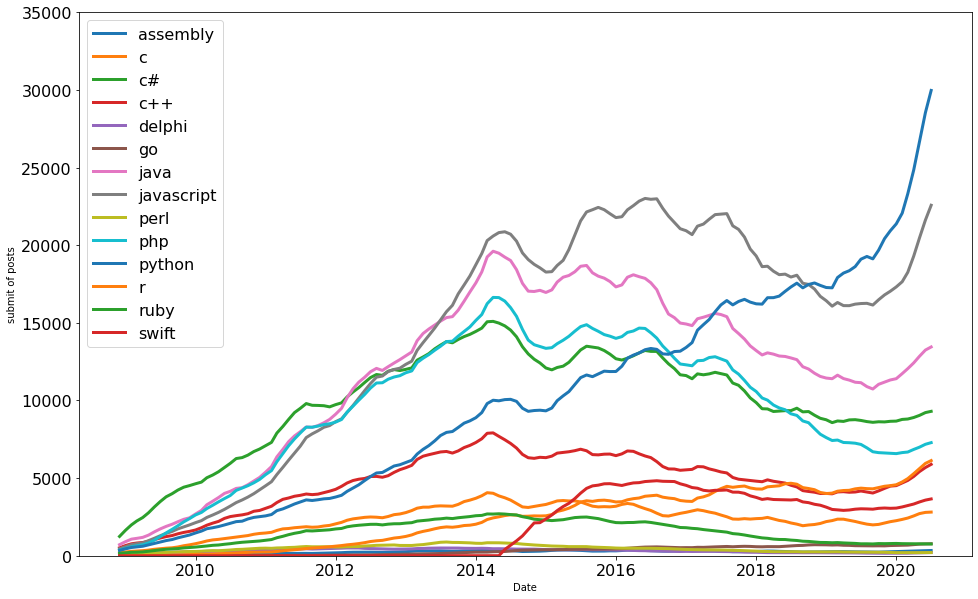

In [47]:
roll_df = pivoted_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("submit of posts")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    plt.legend(fontsize=16)

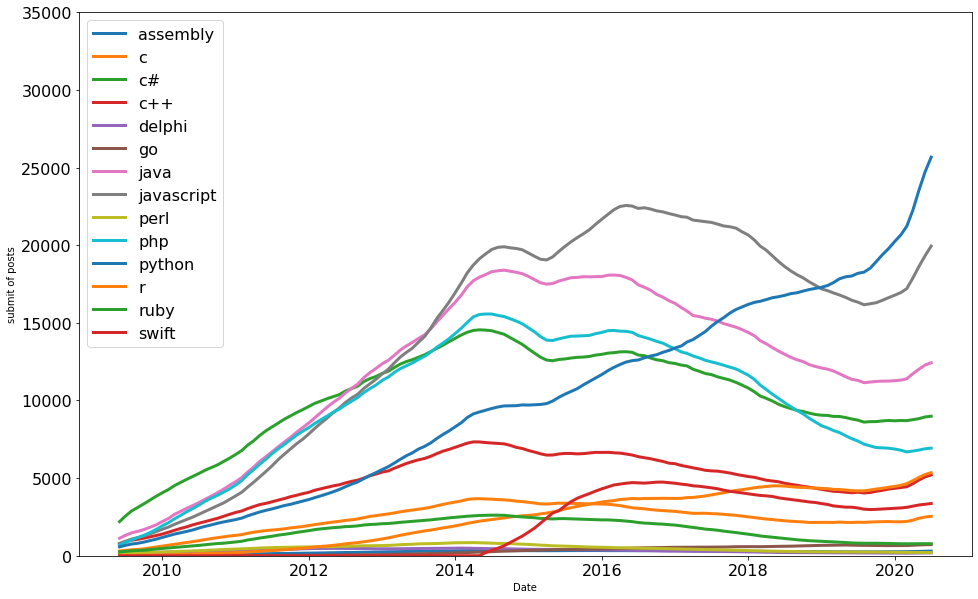

In [49]:
roll_df = pivoted_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("submit of posts")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    plt.legend(fontsize=16)